Import necessary libraries

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Define constants

In [50]:
EPOCHS = 50
BATCH_SIZE = 25
RANDOM_STATE = 20

In [51]:
data_new = pd.read_csv("../heart.csv")
targets = data_new["target"]
features = data_new.drop(columns="target")

print(features.describe())
targets.describe()

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

Analyze correlation between features|

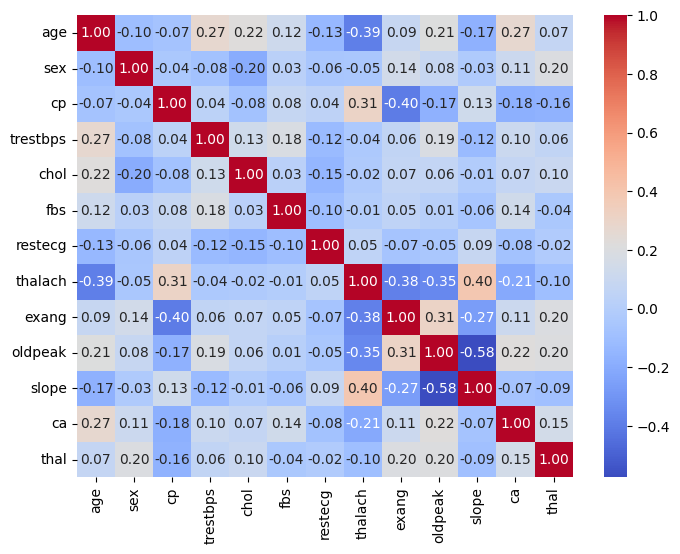

In [52]:
corr_matrix = features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.savefig("correlation_matrix.png")

Creating train/test split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=RANDOM_STATE)

In [54]:
print(np.sum(y_test==1))

106


Standardize and scale the data

In [55]:
scaler = MinMaxScaler()
standardizer = StandardScaler()

X_train = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(standardizer.fit_transform(X_test), columns=X_test.columns)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [56]:
print("X_train: ", X_train.shape)
print(X_train.tail(2))
print("y_train: ", y_train.shape)
print(y_train.tail(2))
print("X_test: ", X_test.shape)
print(X_test.tail(2))
print("y_test: ", y_test.shape)
print(y_test.tail(2))

X_train:  (820, 13)
          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
818  0.312500  1.0  0.333333  0.245283  0.312785  0.0      0.5  0.778626   
819  0.395833  1.0  0.333333  0.150943  0.235160  0.0      0.5  0.740458   

     exang  oldpeak  slope   ca  thal  
818    0.0  0.00000    1.0  0.0   1.0  
819    0.0  0.16129    0.0  0.0   1.0  
y_train:  (820,)
271    1
474    0
Name: target, dtype: int64
X_test:  (205, 13)
          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
203  0.604651  1.0  0.000000      0.17  0.346154  1.0      0.5  0.735537   
204  0.232558  1.0  0.666667      0.40  0.363636  0.0      0.0  0.900826   

     exang   oldpeak  slope   ca      thal  
203    1.0  0.333333    1.0  0.5  1.000000  
204    0.0  0.000000    1.0  0.0  0.666667  
y_test:  (205,)
747    0
541    1
Name: target, dtype: int64


Create fully connected deep network

In [57]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(13,)))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=["accuracy"])

Train the model

In [58]:
history = model.fit(x=X_train, y=y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
loss, accuracy = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
model.save("../model.h5")

Epoch 1/50
33/33 [==============================] - 0s 894us/step - loss: 0.6122 - accuracy: 0.6805
Epoch 2/50
33/33 [==============================] - 0s 888us/step - loss: 0.4517 - accuracy: 0.8073
Epoch 3/50
33/33 [==============================] - 0s 854us/step - loss: 0.4127 - accuracy: 0.8207
Epoch 4/50
33/33 [==============================] - 0s 856us/step - loss: 0.3848 - accuracy: 0.8329
Epoch 5/50
33/33 [==============================] - 0s 825us/step - loss: 0.3731 - accuracy: 0.8415
Epoch 6/50
33/33 [==============================] - 0s 847us/step - loss: 0.3646 - accuracy: 0.8402
Epoch 7/50
33/33 [==============================] - 0s 837us/step - loss: 0.3618 - accuracy: 0.8537
Epoch 8/50
33/33 [==============================] - 0s 803us/step - loss: 0.3494 - accuracy: 0.8610
Epoch 9/50
33/33 [==============================] - 0s 799us/step - loss: 0.3436 - accuracy: 0.8451
Epoch 10/50
33/33 [==============================] - 0s 796us/step - loss: 0.3337 - accuracy: 0.8524

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Confusion Matrix from dense network

In [61]:
loaded_model = tf.keras.models.load_model("../model.h5")
loss, accuracy = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 744us/step - loss: 0.1262 - accuracy: 0.9756


In [ ]:
confusion = tf.math.confusion_matrix(y_test, predictions)
confusion

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 99,   0],
       [106,   0]], dtype=int32)>

Create basic models from sklearn

In [ ]:
models = [
    (LogisticRegression(multi_class="multinomial", max_iter=500), "Logistic Regression"),
    (make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', decision_function_shape='ovo')), "SVM"),
    (make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)), "Random Forest")
    
]

Logistic Regression
Accuracy:  0.8195121951219512
Confusion matrix
tf.Tensor(
[[77 22]
 [15 91]], shape=(2, 2), dtype=int32)


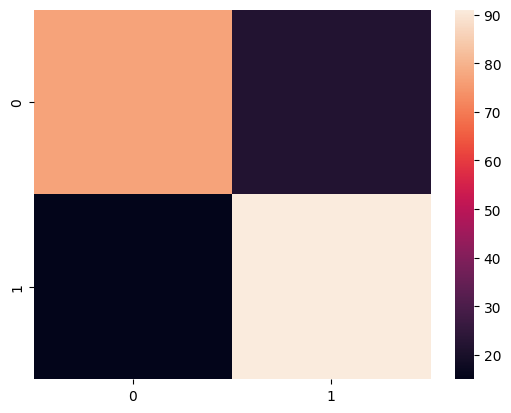

SVM
Accuracy:  0.9317073170731708
Confusion matrix
tf.Tensor(
[[ 88  11]
 [  3 103]], shape=(2, 2), dtype=int32)


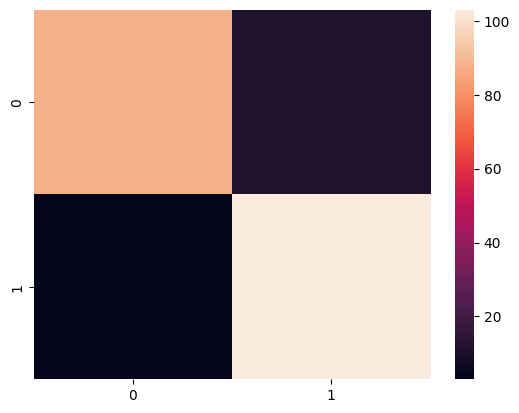

Random Forest
Accuracy:  0.9512195121951219
Confusion matrix
tf.Tensor(
[[ 91   8]
 [  2 104]], shape=(2, 2), dtype=int32)


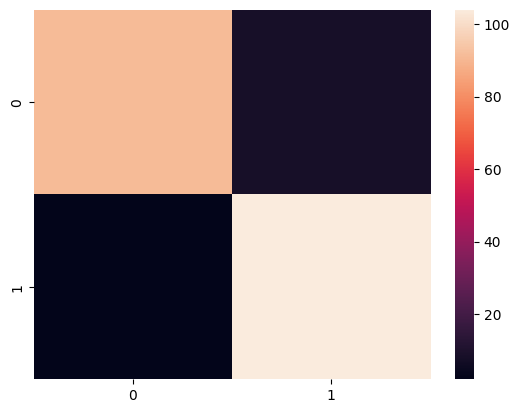

In [ ]:
for model, name in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    confusion_mtx = tf.math.confusion_matrix(y_test, predictions)

    print(name)
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print("Confusion matrix")
    print(confusion_mtx)
    sns.heatmap(confusion_mtx)
    plt.show()
    